In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geoviews as gv
import hvplot.pandas
import holoviews as hv

ModuleNotFoundError: No module named 'geoviews'

In [2]:
## Get the path and read CSV file
path="2022_us .csv"
origin_data=pd.read_csv(path,encoding="ISO-8859-1")
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)
origin_data.head()

C:\Users\langl\AppData\Local\Temp\ipykernel_21088\1911066109.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_data=pd.read_csv(path,encoding="ISO-8859-1")


,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,16. PARENT CO DB NUM,17. STANDARD PARENT CO NAME,18. FEDERAL FACILITY,19. INDUSTRY SECTOR CODE,20. INDUSTRY SECTOR,21. PRIMARY SIC,22. SIC 2,23. SIC 3,24. SIC 4,25. SIC 5,26. SIC 6,27. PRIMARY NAICS,28. NAICS 2,29. NAICS 3,30. NAICS 4,31. NAICS 5,32. NAICS 6,33. DOC_CTRL_NUM,34. CHEMICAL,35. ELEMENTAL METAL INCLUDED,36. TRI CHEMICAL/COMPOUND ID,37. CAS#,38. SRS ID,39. CLEAN AIR ACT CHEMICAL,40. CLASSIFICATION,41. METAL,42. METAL CATEGORY,43. CARCINOGEN,44. PBT,45. PFAS,46. FORM TYPE,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,62. ON-SITE RELEASE TOTAL,63. 6.1 - POTW - TRNS RLSE,64. 6.1 - POTW - TRNS TRT,65. POTW - TOTAL TRANSFERS,66. 6.2 - M10,67. 6.2 - M41,68. 6.2 - M62,69. 6.2 - M40 METAL,70. 6.2 - M61 METAL,71. 6.2 - M71,72. 6.2 - M81,73. 6.2 - M82,74. 6.2 - M72,75. 6.2 - M63,76. 6.2 - M66,77. 6.2 - M67,78. 6.2 - M64,79. 6.2 - M65,80. 6.2 - M73,81. 6.2 - M79,82. 6.2 - M90,83. 6.2 - M94,84. 6.2 - M99,85. OFF-SITE RELEASE TOTAL,86. 6.2 - M20,87. 6.2 - M24,88. 6.2 - M26,89. 6.2 - M28,90. 6.2 - M93,91. OFF-SITE RECYCLED TOTAL,92. 6.2 - M56,93. 6.2 - M92,94. OFF-SITE ENERGY RECOVERY T,95. 6.2 - M40 NON-METAL,96. 6.2 - M50,97. 6.2 - M54,98. 6.2 - M61 NON-METAL,99. 6.2 - M69,100. 6.2 - M95,101. OFF-SITE TREATED TOTAL,102. 6.2 - UNCLASSIFIED,103. 6.2 - TOTAL TRANSFER,104. TOTAL RELEASES,105. 8.1 - RELEASES,106. 8.1A - ON-SITE CONTAINED,107. 8.1B - ON-SITE OTHER,108. 8.1C - OFF-SITE CONTAIN,109. 8.1D - OFF-SITE OTHER R,110. 8.2 - ENERGY RECOVER ON,111. 8.3 - ENERGY RECOVER OF,112. 8.4 - RECYCLING ON SITE,113. 8.5 - RECYCLING OFF SIT,114. 8.6 - TREATMENT ON SITE,115. 8.7 - TREATMENT OFF SITE,116. PRODUCTION WSTE (8.1-8.7),117. 8.8 - ONE-TIME RELEASE,118. PROD_RATIO_OR_ ACTIVITY,119. 8.9 - PRODUCTION RATIO,Unnamed: 119
0,2022,73098KRRMC906SO,1.100000e+11,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,GARVIN,OK,73098,906.0,The Chickasaw Nation,34.62890,-97.16850,NAD83,CVR ENERGY INC,795416135,CVR ENERGY INC,NO,324,Petroleum,NaN,NaN,NaN,NaN,NaN,NaN,324110,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Certain glycol ethers,NO,N230,N230,649541.0,YES,TRI,NO,May contain metal,NO,NO,NO,R,Pounds,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,NaN,ACTIVITY,1.00,NaN
1,2022,74764WYRHSHIGHW,1.100010e+11,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,MCCURTAIN,OK,74764,907.0,The Choctaw Nation of Oklahoma,33.99840,-95.11150,NAD83,INTERNATIONAL PAPER CO,001316561,INTERNATIONAL PAPER CO,NO,322,Paper,NaN,NaN,NaN,NaN,NaN,NaN,322130,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Lead compounds,NO,N420,N420,650002.0,YES,PBT,YES,Metal complound categories,NO,YES,NO,R,Pounds,0.00,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,2948.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2718.0,2718.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2718.0,2948.00,0.0,1833.0,1115.00,0.0,0.0,0.0,0.0,0.0,2718.0,0.0,0.0,5666.00,0.0,PRODUCTION,0.97,NaN
2,2022,7453WCLGTT475MI,1.100580e+11,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,COAL,OK,74538,907.0,The Choctaw Nation of Oklahoma,34.58604,-96.28672,NAD83,TARGA RESOURCES CORP,827389847,TARGA RESOURCES CORP,NO,999,Other,NaN,NaN,NaN,NaN,NaN,NaN,211130,NaN,NaN,NaN,NaN,NaN,1.322220e+12,Methanol,NO,0000067561,67-56-1,4283.0,YES,TR

Text(0, 0.5, 'Pounds')

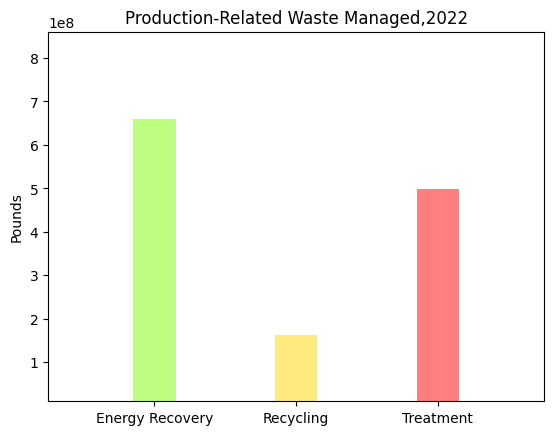

In [3]:
petro_ma=(origin_data["20. INDUSTRY SECTOR"]=="Petroleum") & (origin_data["47. UNIT OF MEASURE"]=="Pounds")
origin_data1=origin_data.loc[petro_ma]

manage=origin_data1[["110. 8.2 - ENERGY RECOVER ON","111. 8.3 - ENERGY RECOVER OF","112. 8.4 - RECYCLING ON SITE","113. 8.5 - RECYCLING OFF SIT","114. 8.6 - TREATMENT ON SITE","115. 8.7 - TREATMENT OFF SITE","104. TOTAL RELEASES","61. 5.5.4 - OTHER DISPOSAL"]]
on_energy=manage["110. 8.2 - ENERGY RECOVER ON"].sum()
off_energy=manage["111. 8.3 - ENERGY RECOVER OF"].sum()
on_recycle=manage["112. 8.4 - RECYCLING ON SITE"].sum()
off_recycle=manage["113. 8.5 - RECYCLING OFF SIT"].sum()
on_treatment=manage["114. 8.6 - TREATMENT ON SITE"].sum()
off_treatment=manage["115. 8.7 - TREATMENT OFF SITE"].sum()
other_disposal=manage["61. 5.5.4 - OTHER DISPOSAL"].sum()
on_energy,off_energy,on_recycle,off_recycle,on_treatment,off_treatment,other_disposal
manage_df=pd.DataFrame({"Energy Recovery":on_energy+off_energy,"Recycling":on_recycle+off_recycle,"Treatment":on_treatment+off_treatment},index=[0])
manage_df.astype(np.int64)
users=[660521648,163119837,499302638]
x_axis=np.arange(len(users))
plt.bar(x_axis,users,color=["lawngreen","gold","red"], alpha=0.5, align="center",width=0.3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Energy Recovery", "Recycling", "Treatment"])
plt.ylim(10000000, max(users)+200000000)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Production-Related Waste Managed,2022")
plt.ylabel("Pounds")

In [4]:
## Select the column we need
col=["4. FACILITY NAME","5. STREET ADDRESS","6. CITY","8. ST","12. LATITUDE","13. LONGITUDE","14. HORIZONTAL DATUM","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","40. CLASSIFICATION","42. METAL CATEGORY","43. CARCINOGEN","47. UNIT OF MEASURE",
             "48. 5.1 - FUGITIVE AIR","49. 5.2 - STACK AIR","50. 5.3 - WATER","51. 5.4 - UNDERGROUND","52. 5.4.1 - UNDERGROUND CL I","53. 5.4.2 - UNDERGROUND C II-V","54. 5.5.1 - LANDFILLS","55. 5.5.1A - RCRA C LANDFILL","56. 5.5.1B - OTHER LANDFILLS",
             "57. 5.5.2 - LAND TREATMENT","58. 5.5.3 - SURFACE IMPNDMNT","59. 5.5.3A - RCRA SURFACE IM","60. 5.5.3B - OTHER SURFACE I","61. 5.5.4 - OTHER DISPOSAL","85. OFF-SITE RELEASE TOTAL","104. TOTAL RELEASES","116. PRODUCTION WSTE (8.1-8.7)"]
select_col=origin_data[col]
select_col.head(3)           


,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,8. ST,12. LATITUDE,13. LONGITUDE,14. HORIZONTAL DATUM,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,40. CLASSIFICATION,42. METAL CATEGORY,43. CARCINOGEN,47. UNIT OF MEASURE,48. 5.1 - FUGITIVE AIR,49. 5.2 - STACK AIR,50. 5.3 - WATER,51. 5.4 - UNDERGROUND,52. 5.4.1 - UNDERGROUND CL I,53. 5.4.2 - UNDERGROUND C II-V,54. 5.5.1 - LANDFILLS,55. 5.5.1A - RCRA C LANDFILL,56. 5.5.1B - OTHER LANDFILLS,57. 5.5.2 - LAND TREATMENT,58. 5.5.3 - SURFACE IMPNDMNT,59. 5.5.3A - RCRA SURFACE IM,60. 5.5.3B - OTHER SURFACE I,61. 5.5.4 - OTHER DISPOSAL,85. OFF-SITE RELEASE TOTAL,104. TOTAL RELEASES,116. PRODUCTION WSTE (8.1-8.7)
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.99840,-95.11150,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.0,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,0.0,2948.0,5666.0
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.58604,-96.28672,NAD83,TARGA RESOURCES CORP,Other,Methanol,TRI,Non_Metal,NO,Pounds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## Rename the column
new_col=select_col.copy()
new_col=new_col.rename(columns={"4. FACILITY NAME":"Facility name","5. STREET ADDRESS":"Street Address","6. CITY":"City","8. ST":"State","12. LATITUDE":"Latitude","13. LONGITUDE":"Longitude","14. HORIZONTAL DATUM":"Horizontal","15. PARENT CO NAME":"Parent Co Name","20. INDUSTRY SECTOR":"Industry Sector","34. CHEMICAL":"Chemical",
                "40. CLASSIFICATION":"Class","42. METAL CATEGORY":"Metal Cata","43. CARCINOGEN":"Carcinogen","47. UNIT OF MEASURE":"Unit","48. 5.1 - FUGITIVE AIR":"Fugitive Air","49. 5.2 - STACK AIR":"Stack Air","50. 5.3 - WATER":"Water","51. 5.4 - UNDERGROUND":"Underground","52. 5.4.1 - UNDERGROUND CL I":"Undergroud I","53. 5.4.2 - UNDERGROUND C II-V":"Underground II",
                "54. 5.5.1 - LANDFILLS":"Landfills","55. 5.5.1A - RCRA C LANDFILL":"RCRA C Landfill","56. 5.5.1B - OTHER LANDFILLS":"Other Landfills","57. 5.5.2 - LAND TREATMENT":"Land Treatment","58. 5.5.3 - SURFACE IMPNDMNT":"Surface IM","59. 5.5.3A - RCRA SURFACE IM":"RCRA Surface IM","60. 5.5.3B - OTHER SURFACE I":"Other Surface",
                "61. 5.5.4 - OTHER DISPOSAL":"Other Disposal","62. ON-SITE RELEASE TOTAL":"On_site release","85. OFF-SITE RELEASE TOTAL":"Off_site Disposal","104. TOTAL RELEASES":"Total Releases","116. PRODUCTION WSTE (8.1-8.7)":"Production WSTE"})
new_col.head()

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.99840,-95.11150,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.00,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,0.0,2948.00,5666.00
2,COALGATE TUPELO STONEWALL GAS PLANT,37791 STATE HWY 3,COALGATE,OK,34.58604,-96.28672,NAD83,TARGA RESOURCES CORP,Other,Methanol,TRI,Non_Metal,NO,Pounds,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
3,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.99840,-95.11150,NAD83,INTERNATIONAL PAPER CO,Paper,Phenol,TRI,Non_Metal,NO,Pounds,470.00,10837.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11326.00,24425.00
4,US ARMY MCALESTER ARMY AMMUNITION PLANT,1 C TREE RD,MCALESTER,OK,34.84500,-95.89300,NAD83,US DEPARTMENT OF DEFENSE,Other,Dibutyl phthalate,TRI,Non_Metal,NO,Pounds,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,59245.01


In [6]:
## Drop 0 total releases 
new_col_drop=new_col[new_col["Total Releases"] !=0.00]
new_col_drop.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
1,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.9984,-95.1115,NAD83,INTERNATIONAL PAPER CO,Paper,Lead compounds,PBT,Metal complound categories,NO,Pounds,0.00,949.0,166.0,0.0,0.0,0.0,0.0,0.0,1833.0,0.0,0.0,0.0,0.0,0.0,0.0,2948.00,5666.00
3,INTERNATIONAL PAPER CO,890 IP LN,VALLIANT,OK,33.9984,-95.1115,NAD83,INTERNATIONAL PAPER CO,Paper,Phenol,TRI,Non_Metal,NO,Pounds,470.00,10837.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11326.00,24425.00
4,US ARMY MCALESTER ARMY AMMUNITION PLANT,1 C TREE RD,MCALESTER,OK,34.8450,-95.8930,NAD83,US DEPARTMENT OF DEFENSE,Other,Dibutyl phthalate,TRI,Non_Metal,NO,Pounds,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,59245.01


In [7]:
##Specific petroleum industry
petro=new_col_drop["Industry Sector"]=="Petroleum"
petro_col=new_col_drop.loc[petro]
petro_col.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.62890,-97.16850,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29
9,VALERO REFINING CO -OKLAHOMA VALERO ARDMORE RE...,ONE VALERO WAY,ARDMORE,OK,34.20569,-97.10417,NAD83,VALERO ENERGY CORP,Petroleum,"Benzo[g,h,i]perylene",PBT,Non_Metal,NO,Pounds,1.0,0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.20,1.20


In [8]:
## Calculate the total releases of petroleum in each State
petro_ST=petro_col.groupby(["State"])
petro_ST_sum=petro_ST["Total Releases"].sum()
Lat=petro_col.groupby(["State"])["Latitude"].mean()
Lng=petro_col.groupby(["State"])["Longitude"].mean()
state=['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND',
'NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','SC','TN','TX','UT','VA','VI','VT','WA','WI','WV','WY']

## Create a new dataframe just for state and new Lat and Long 
State_df=pd.DataFrame({"State":state,"Latitude":Lat,"Longitude":Lng,"Total Releases":petro_ST_sum})


In [9]:
## That's the map for total releases in just petroleum industry 

#%%capture --no-display
map_plot = State_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    size = "Total Releases",
    scale = 0.02,
    color = 'State',
    alpha= 0.8
    )
map_plot


AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [10]:
##All industry releases of US
Industry=new_col.groupby(["Industry Sector"])
Industry_sum=Industry["Total Releases"].sum()
Industry_sum=Industry_sum.sort_values(ascending=True)
Industry_sum= Industry_sum.round(2)

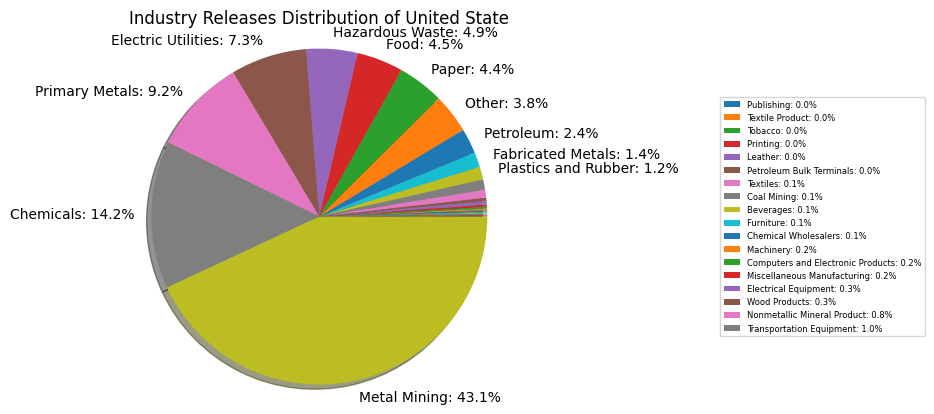

In [11]:
index = Industry_sum.index
values = Industry_sum
# Calculate the percentage
total = sum(values)
percentages = [(val / total) * 100 for val in values]
# Threshold for excluding segments from the pie chart labels
threshold = 1.0
# Create labels for pie chart segments
labels = [f"{index[i]}: {percentages[i]:.1f}%" if percentages[i] >= threshold else '' for i in range(len(index))]
# Create labels for the dropped segments
dropped_labels = [f"{index[i]}: {percentages[i]:.1f}%" for i in range(len(index)) if percentages[i] < threshold]
# Create the pie chart
plt.pie(values, labels=labels, autopct="", shadow=True)
plt.title("Industry Releases Distribution of United State")
plt.axis("equal")
# Create a legend for dropped segments
plt.legend(dropped_labels, loc='center left', bbox_to_anchor=(1.3, 0, 0.3, 1), prop={"size": 6})
plt.savefig("png_output/Fig3.png")

Text(0.5, 1.0, 'Total Releases Of State,Petroleum')

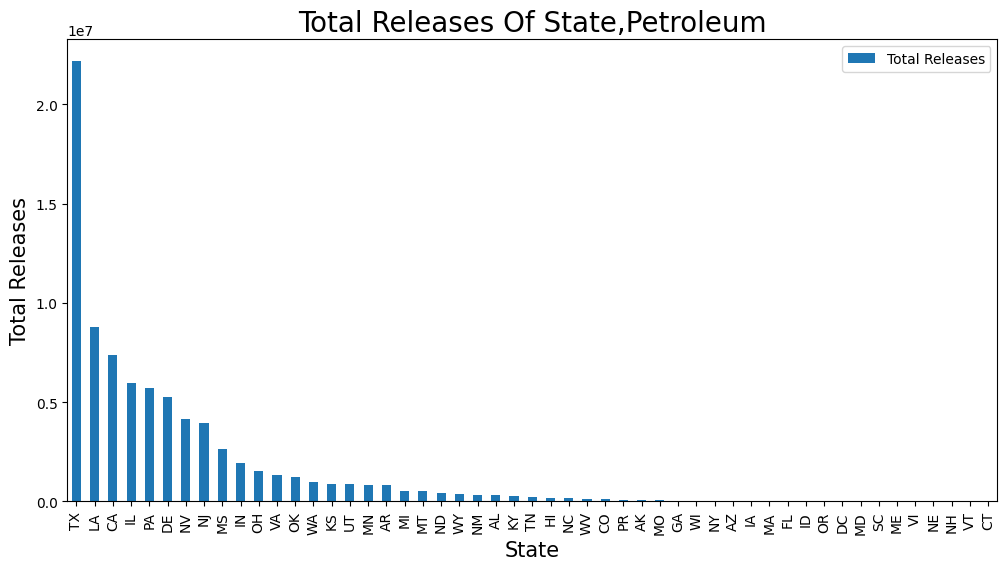

In [12]:
##Total releases of Petroleum by each state
State_group=petro_col.groupby(["State"])
sum1=State_group["Total Releases"].sum()
release_sum_df=sum1.to_frame()
release_sum_df=release_sum_df.sort_values("Total Releases",ascending=False)
release_sum_df=release_sum_df.astype({"Total Releases":"long"})
release_sum_df.head(10)
#other=release_sum_df["Total Releases"] < 5735986
#other_states=release_sum_df.loc[other]
#other_states_sum=other_states.sum()
## Bar chart for total releases of petroleum by State 
bar=release_sum_df.plot(kind="bar", figsize = (12,6))
bar.set_xlabel ("State", size = 15)
bar.set_ylabel ("Total Releases", size = 15)
bar.set_title("Total Releases Of State,Petroleum",size=20)



C:\Users\langl\AppData\Local\Temp\ipykernel_21088\1530284011.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values=[22162810,8807921,7369010,5955656,5735986,other_states_sum[0]]


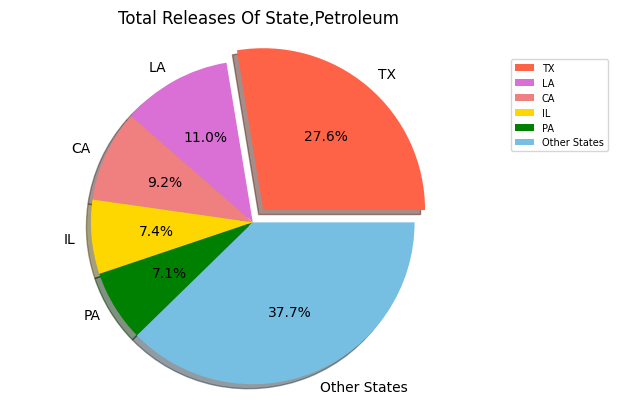

In [13]:
## Pie chart for top 5 total releases and other states of petroleum 
other=release_sum_df["Total Releases"] < 5735986
other_states=release_sum_df.loc[other]
other_states_sum=other_states.sum()
labels=["TX","LA","CA","IL","PA","Other States"]
values=[22162810,8807921,7369010,5955656,5735986,other_states_sum[0]]
colors = ["tomato", "orchid", "lightcoral", "gold","green","#77BFE2"]
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=0)
plt.title("Total Releases Of State,Petroleum")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig1.png")


In [14]:
##Specific Texas with all industries
new=new_col["State"]=="TX"
TX_df=new_col.loc[new]
TX_Industry=TX_df.groupby(["Industry Sector"])
TX_Industry_sum=TX_Industry["Total Releases"].sum()
TX_Industry_sum=TX_Industry_sum.sort_values(ascending=True)
TX_Industry_sum= TX_Industry_sum.round(2)




In [15]:
from matplotlib.pyplot import MultipleLocator

In [16]:
##Total releases in Petroleum 
petro_pounds=(new_col["Industry Sector"]=="Petroleum") & (new_col["Unit"]=="Pounds")
select_col=new_col.loc[petro_pounds]
select_col.head(3)

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29


In [17]:
##Create and calculate releases in Air ,land, Water
select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+select_col["Surface IM"]+select_col["RCRA Surface IM"]+select_col["Other Surface"]+select_col["Other Disposal"]
select_col.head(3)


C:\Users\langl\AppData\Local\Temp\ipykernel_21088\3769493662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Air"]=select_col["Fugitive Air"]+select_col["Stack Air"]
C:\Users\langl\AppData\Local\Temp\ipykernel_21088\3769493662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_col["Land"]=select_col["Underground"]+select_col["Undergroud I"]+select_col["Underground II"]+select_col["Landfills"]+select_col["RCRA C Landfill"]+select_col["Other Landfills"]+select_col["Land Treatment"]+sel

,Facility name,Street Address,City,State,Latitude,Longitude,Horizontal,Parent Co Name,Industry Sector,Chemical,Class,Metal Cata,Carcinogen,Unit,Fugitive Air,Stack Air,Water,Underground,Undergroud I,Underground II,Landfills,RCRA C Landfill,Other Landfills,Land Treatment,Surface IM,RCRA Surface IM,Other Surface,Other Disposal,Off_site Disposal,Total Releases,Production WSTE,Air,Land
0,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Certain glycol ethers,TRI,May contain metal,NO,Pounds,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
5,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Hydrogen cyanide,TRI,Non_Metal,NO,Pounds,0.0,32234.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32234.00,32234.00,32234.0,0.0
8,WYNNEWOOD REFINING CO,906 S POWELL AVE,WYNNEWOOD,OK,34.6289,-97.1685,NAD83,CVR ENERGY INC,Petroleum,Cyclohexane,TRI,Non_Metal,NO,Pounds,250.0,750.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1005.29,7758.29,1000.0,0.0


In [18]:
##Create a dataframe for Water ,Air,Land ,Off-site
new_col=select_col[["Water","Air","Land","Off_site Disposal"]]
new_col

,Water,Air,Land,Off_site Disposal
0,0.00,0.00,0.0,0.00
5,0.00,32234.00,0.0,0.00
8,0.29,1000.00,0.0,5.00
9,0.00,1.20,0.0,0.00
16,64.00,376.00,0.0,0.00
...,...,...,...,...
78764,0.00,0.00,0.0,4.33
78768,0.00,639.50,0.0,0.00
78804,0.00,37.00,0.0,0.00
78805,1.00,29.00,0.0,5.00


In [19]:
##Calculate sum of releases in Air,Water,Land
new_sum=new_col.sum()
new_sum=new_sum.sort_values(ascending=True)
new_sum

Land                  4391351.12
Off_site Disposal     7789189.60
Water                33921468.87
Air                  34199159.60
dtype: float64

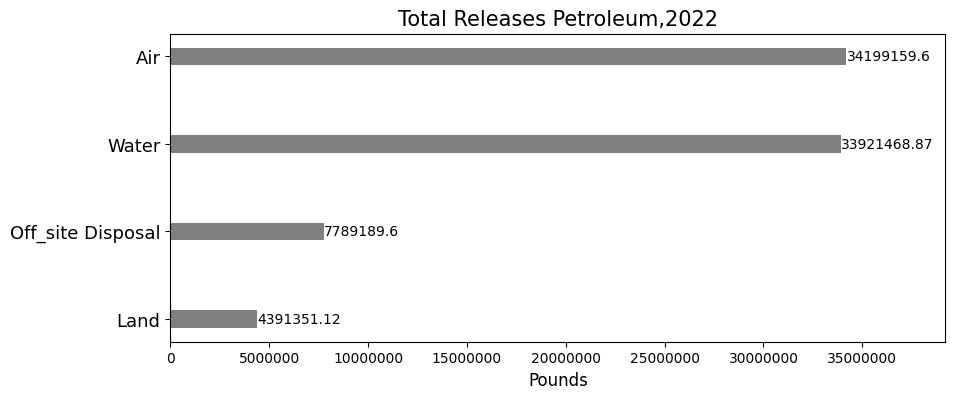

In [20]:
## Bar chart for total releases in air,water,land of petroleum
fig1, ax1 = plt.subplots(figsize=(10,4),dpi=100)
barh=plt.barh(y=new_sum.index,width=new_sum.values,height=0.2,color='gray')
#plt.Figure(figsize=(19,6))
#plt.xticks(rotation="horizontal", fontsize=8)
plt.yticks(fontsize=13)
plt.xlabel("Pounds",size=12)
plt.title("Total Releases Petroleum,2022",size=15)
plt.xlim(0, max(new_sum.values)+5000000)
ax1.get_xaxis().get_major_formatter().set_scientific(False)
plt.bar_label(barh,fmt=float)
plt.savefig("png_output/Fig4.png")



In [21]:
##New dataframe fot top 5 chemicals releases in Air
air_sum=select_col.groupby(["Chemical"])["Air"].sum()
sort_air=air_sum.sort_values(ascending=False)
sort_air=sort_air.to_frame()
other=sort_air["Air"] < 2451944.98
Other_Chemicals=sort_air.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df


C:\Users\langl\AppData\Local\Temp\ipykernel_21088\2248527880.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Ammonia":5842586.71,"Sulfuric acid":5079506.33,"Hydrogen cyanide":4847537.38,"n-Hexane":2880246.60,"Toluene":2451944.98,"Other Chemicals":Other_sum[0]},index=[1])


,Ammonia,Sulfuric acid,Hydrogen cyanide,n-Hexane,Toluene,Other Chemicals
1,5842586.71,5079506.33,4847537.38,2880246.6,2451944.98,13097337.6


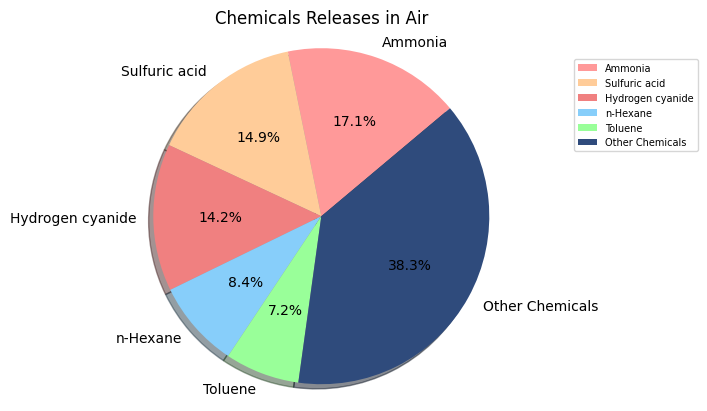

In [22]:
## Pie chart fot top 5 chemicals releases in Air
labels=["Ammonia","Sulfuric acid","Hydrogen cyanide","n-Hexane","Toluene","Other Chemicals"]
values=[5842586.71,5079506.33,4847537.38,2880246.6,2451944.98,13097337.6]
colors = ["#ff9999", "#ffcc99", "lightcoral", "lightskyblue","#99ff99","#2f4b7c"]
plt.pie(values,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=40)
plt.title("Chemicals Releases in Air")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig5.png")

In [23]:
###New dataframe fot top 5 chemicals releases in Water
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 26260.20
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\langl\AppData\Local\Temp\ipykernel_21088\1889128139.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Ammonia":366618.55,"Ethylene glycol":56017.08,"Methanol":46429.81,"Zinc compounds":26260.20,"Other Chemicals":Other_sum[0]},index=[1])


,Nitrate compounds,Ammonia,Ethylene glycol,Methanol,Zinc compounds,Other Chemicals
1,33300832.82,366618.55,56017.08,46429.81,26260.2,125310.41


C:\Users\langl\AppData\Local\Temp\ipykernel_21088\3159963154.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])


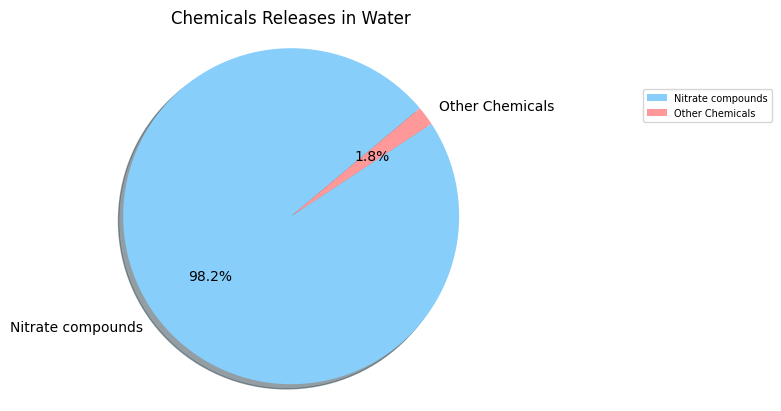

In [24]:
## Pie chart fot top 5 chemicals releases in Water
water_sum=select_col.groupby(["Chemical"])["Water"].sum()
sort_water=water_sum.sort_values(ascending=False)
sort_water=sort_water.to_frame()
other=sort_water["Water"] < 33300832.82
Other_Chemicals=sort_water.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Nitrate compounds":33300832.82,"Other Chemicals":Other_sum[0]},index=[1])
labels=["Nitrate compounds","Other Chemicals"]
values=[33300832.82,620636.05]
color=["lightskyblue","#ff9999"]
plt.pie(values,labels=labels,autopct="%1.1f%%",colors=color,shadow=True,startangle=40)
plt.title("Chemicals Releases in Water")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.2,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig6.png")

In [25]:
###New dataframe fot top 5 chemicals releases in Land
land_sum=select_col.groupby(["Chemical"])["Land"].sum()
sort_land=land_sum.sort_values(ascending=False)
sort_land=sort_land.to_frame()
other=sort_land["Land"] < 105370.44
Other_Chemicals=sort_land.loc[other]
Other_sum=Other_Chemicals.sum()
Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])
Chemical_df

C:\Users\langl\AppData\Local\Temp\ipykernel_21088\314715120.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chemical_df=pd.DataFrame({"Hydrogen sulfide":1775650.87,"Ammonia":1474424.71,"Nitrate compounds":273632.63,"tert-Butyl alcohol":260000.00,"Toluene":105370.44,"Other Chemicals":Other_sum[0]},index=[1])


,Hydrogen sulfide,Ammonia,Nitrate compounds,tert-Butyl alcohol,Toluene,Other Chemicals
1,1775650.87,1474424.71,273632.63,260000.0,105370.44,502272.47


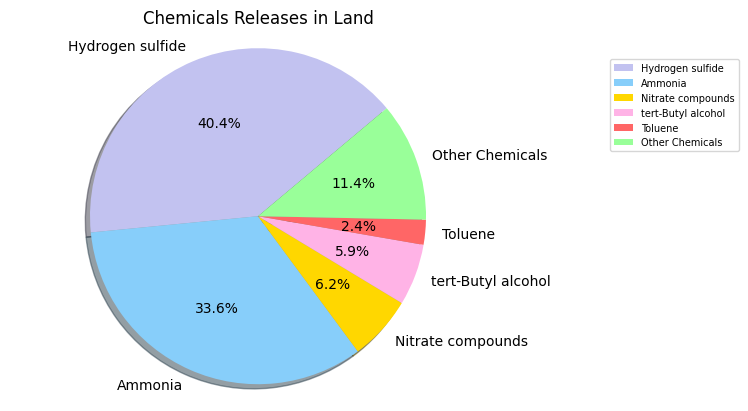

In [26]:
## Pie chart fot top 5 chemicals releases in Land
labels=["Hydrogen sulfide","Ammonia","Nitrate compounds","tert-Butyl alcohol","Toluene","Other Chemicals"]
values=[1775650.87,1474424.71,273632.63,260000.0,105370.44,502272.47]
color=["#c2c2f0","lightskyblue","gold","#ffb3e6","#ff6666","#99ff99"]
plt.pie(values,labels=labels,autopct="%1.1f%%",colors=color,shadow=True,startangle=40)
plt.title("Chemicals Releases in Land")
plt.axis("equal")
plt.legend(loc='center left',bbox_to_anchor=(1.2,0.3,0.3,1),prop={"size":7}) 
plt.savefig("png_output/Fig7.png")

The facility with the highest Total Releases in the 'Petroleum' category is 'DELAWARE CITY REFINERY' with a total release amount of 4893579.0 pounds.
The facility in Texas with the highest Total Releases in the 'Petroleum' category is 'VALERO REFINING - TEXAS L.P. HOUSTON REFINERY' with a total release amount of 2057066.0 pounds.
The difference in total releases between the highest overall and highest in Texas in the 'Petroleum' category is 2836513.0 pounds.
The highest overall facility in the 'Petroleum' category has higher total releases.
The percentage difference between the two facilities in the 'Petroleum' category is 137.89%.


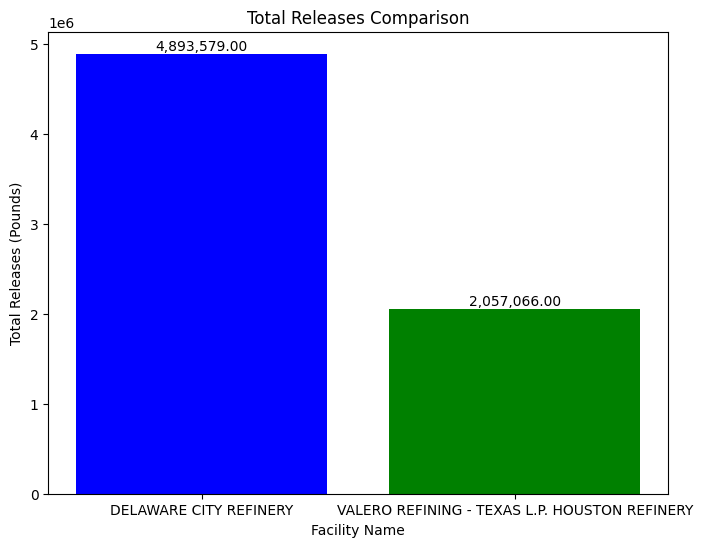

<Figure size 640x480 with 0 Axes>

In [37]:
# Filter the DataFrame for the "Petroleum" category
petroleum_select_col = select_col[select_col['Industry Sector'] == 'Petroleum']

# Find the index of the row with the highest "Total Releases" value in the "Petroleum" category
max_release_index = petroleum_select_col['Total Releases'].idxmax()

# Get the Facility name and Total Releases amount for the facility with the highest releases in the "Petroleum" category
facility_name_with_highest_releases = petroleum_select_col.loc[max_release_index, 'Facility name']
highest_total_releases = petroleum_select_col.loc[max_release_index, 'Total Releases']

# Print the result
print(f"The facility with the highest Total Releases in the 'Petroleum' category is '{facility_name_with_highest_releases}' with a total release amount of {highest_total_releases} pounds.")

# Filter the DataFrame for facilities in the state of Texas (TX) within the "Petroleum" category
tx_facilities_petroleum = petroleum_select_col[petroleum_select_col['State'] == 'TX']

# Find the index of the row with the highest "Total Releases" value in Texas within the "Petroleum" category
max_release_index_tx = tx_facilities_petroleum['Total Releases'].idxmax()

# Get the Facility name and Total Releases amount for the facility with the highest releases in Texas within the "Petroleum" category
facility_name_highest_releases_tx = tx_facilities_petroleum.loc[max_release_index_tx, 'Facility name']
highest_total_releases_tx = tx_facilities_petroleum.loc[max_release_index_tx, 'Total Releases']

# Print the result
print(f"The facility in Texas with the highest Total Releases in the 'Petroleum' category is '{facility_name_highest_releases_tx}' with a total release amount of {highest_total_releases_tx} pounds.")

# Find the difference in total releases between the highest overall and highest in Texas within the "Petroleum" category
difference_in_releases = highest_total_releases - highest_total_releases_tx

# Print the difference
print(f"The difference in total releases between the highest overall and highest in Texas in the 'Petroleum' category is {difference_in_releases} pounds.")

# Calculate the percentage difference
percentage_difference = ((highest_total_releases - highest_total_releases_tx) / highest_total_releases_tx) * 100

# Determine which value is higher
higher_value = "highest overall" if highest_total_releases > highest_total_releases_tx else "highest in Texas"

# Print the result
print(f"The {higher_value} facility in the 'Petroleum' category has {'higher' if highest_total_releases > highest_total_releases_tx else 'lower'} total releases.")
print(f"The percentage difference between the two facilities in the 'Petroleum' category is {abs(percentage_difference):.2f}%.")

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Create a bar graph to visualize the difference in total releases
facility_names = [facility_name_with_highest_releases, facility_name_highest_releases_tx]
total_releases = [highest_total_releases, highest_total_releases_tx]

plt.figure(figsize=(8, 6))
plt.bar(facility_names, total_releases, color=['blue', 'green'])
plt.title('Total Releases Comparison')
plt.xlabel('Facility Name')
plt.ylabel('Total Releases (Pounds)')

# Add labels for the bars
for i in range(len(facility_names)):
    plt.text(i, total_releases[i] + 5000, f"{total_releases[i]:,.2f}", ha='center', va='bottom')

# Format the y-axis ticks as non-scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

plt.show()
plt.savefig("png_output/Fig8.png")



In [28]:
# Filter the data for the "Petroleum" category
petroleum_in_tx = select_col[(select_col['State'] == 'TX') & (select_col['Industry Sector'] == 'Petroleum')]

# Group the filtered data by city and sum the "Total Releases" for each city
city_total_releases = petroleum_in_tx.groupby('City')['Total Releases'].sum()

# Find the city with the highest total releases in Texas for the "Petroleum" category
city_with_highest_releases = city_total_releases.idxmax()
highest_releases_in_city = city_total_releases.max()

# Print the result
print(f"The city in Texas with the highest total releases in the 'Petroleum' category is '{city_with_highest_releases}' with a total release amount of {highest_releases_in_city} pounds.")

# Filter the data for the "Petroleum" category
petroleum_total_releases = select_col[select_col['Industry Sector'] == 'Petroleum']

# Group the filtered data by city and sum the "Total Releases" for each city
city_total_releases_petroleum = petroleum_total_releases.groupby('City')['Total Releases'].sum()

# Find the city with the highest total releases in the "Petroleum" category
city_with_highest_releases_petroleum = city_total_releases_petroleum.idxmax()
highest_releases_in_city_petroleum = city_total_releases_petroleum.max()

# Print the result
print(f"The city with the highest total releases in the 'Petroleum' category (nationally) is '{city_with_highest_releases_petroleum}' with a total release amount of {highest_releases_in_city_petroleum} pounds.")


The city in Texas with the highest total releases in the 'Petroleum' category is 'TEXAS CITY' with a total release amount of 6133697.7 pounds.
The city with the highest total releases in the 'Petroleum' category (nationally) is 'TEXAS CITY' with a total release amount of 6133697.7 pounds.


Top 5 highest-emitting facilities for petroleum nationally:
                        Facility name  Total Releases
18761          DELAWARE CITY REFINERY       4893579.0
72020       SAFETY-KLEEN SYSTEMS INC.       3937728.0
55476              USS-CLAIRTON PLANT       3624255.0
16718  PHILLIPS 66 CO-BAYWAY REFINERY       3375200.0
658               WOOD RIVER REFINERY       2634292.0

Top 5 emitting facilities for petroleum in Texas:
                                       Facility name  Total Releases
48565  VALERO REFINING - TEXAS L.P. HOUSTON REFINERY       2057066.0
65997                      BLANCHARD REFINING CO LLC       1757100.0
53394                      BLANCHARD REFINING CO LLC       1526700.0
38170         PHILLIPS 66 CO SWEENY REFINERY COMPLEX       1387540.0
23596                       VALERO REFINING-TEXAS LP       1100000.0


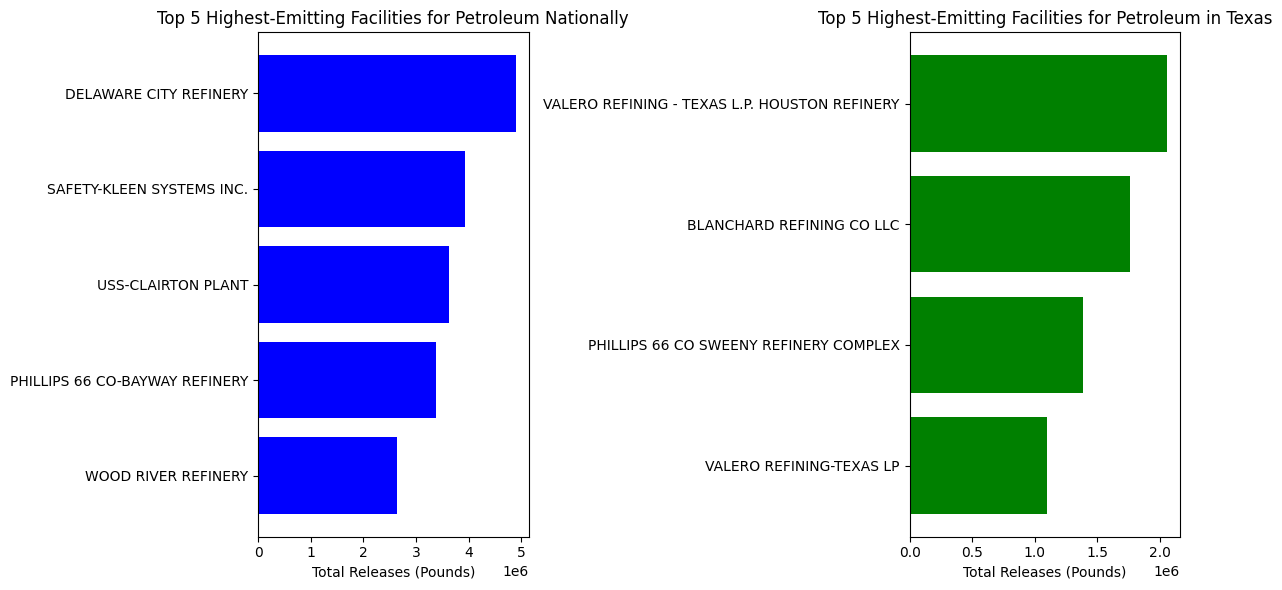

<Figure size 640x480 with 0 Axes>

In [38]:
# Filter the DataFrame for the "Petroleum" category
petroleum_select_col = select_col[select_col['Industry Sector'] == 'Petroleum']

# Find the top 5 highest-emitting facilities for petroleum nationally
top_5_nationally = petroleum_select_col.nlargest(5, 'Total Releases')

# Find the top 5 emitting facilities for petroleum in Texas
tx_facilities_petroleum = petroleum_select_col[petroleum_select_col['State'] == 'TX']
top_5_in_tx = tx_facilities_petroleum.nlargest(5, 'Total Releases')

# Print the top 5 nationally
print("Top 5 highest-emitting facilities for petroleum nationally:")
print(top_5_nationally[['Facility name', 'Total Releases']])

# Print the top 5 in Texas
print("\nTop 5 emitting facilities for petroleum in Texas:")
print(top_5_in_tx[['Facility name', 'Total Releases']])

import matplotlib.pyplot as plt

# Create a bar graph to visualize the top 5 highest-emitting facilities nationally
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh(top_5_nationally['Facility name'], top_5_nationally['Total Releases'], color='blue')
plt.title('Top 5 Highest-Emitting Facilities for Petroleum Nationally')
plt.xlabel('Total Releases (Pounds)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top

# Create a bar graph to visualize the top 5 highest-emitting facilities in Texas
plt.subplot(122)
plt.barh(top_5_in_tx['Facility name'], top_5_in_tx['Total Releases'], color='green')
plt.title('Top 5 Highest-Emitting Facilities for Petroleum in Texas')
plt.xlabel('Total Releases (Pounds)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest at the top

plt.tight_layout()
plt.show()
plt.savefig("png_output/Fig9.png")

Lowest 5 emitting facilities for petroleum nationally:
             Facility name  Total Releases
0    WYNNEWOOD REFINING CO             0.0
35   WYNNEWOOD REFINING CO             0.0
66   WYNNEWOOD REFINING CO             0.0
124     ATLAS ROOFING CORP             0.0
180  WYNNEWOOD REFINING CO             0.0

Lowest 5 emitting facilities for petroleum in Texas:
                        Facility name  Total Releases
363   PHILLLIPS 66 CO BORGER REFINERY             0.0
775      ALON USA-BIG SPRING REFINERY             0.0
1501              HOUSTON REFINING LP             0.0
1535                         HENRY CO             0.0
1615  PHILLLIPS 66 CO BORGER REFINERY             0.0


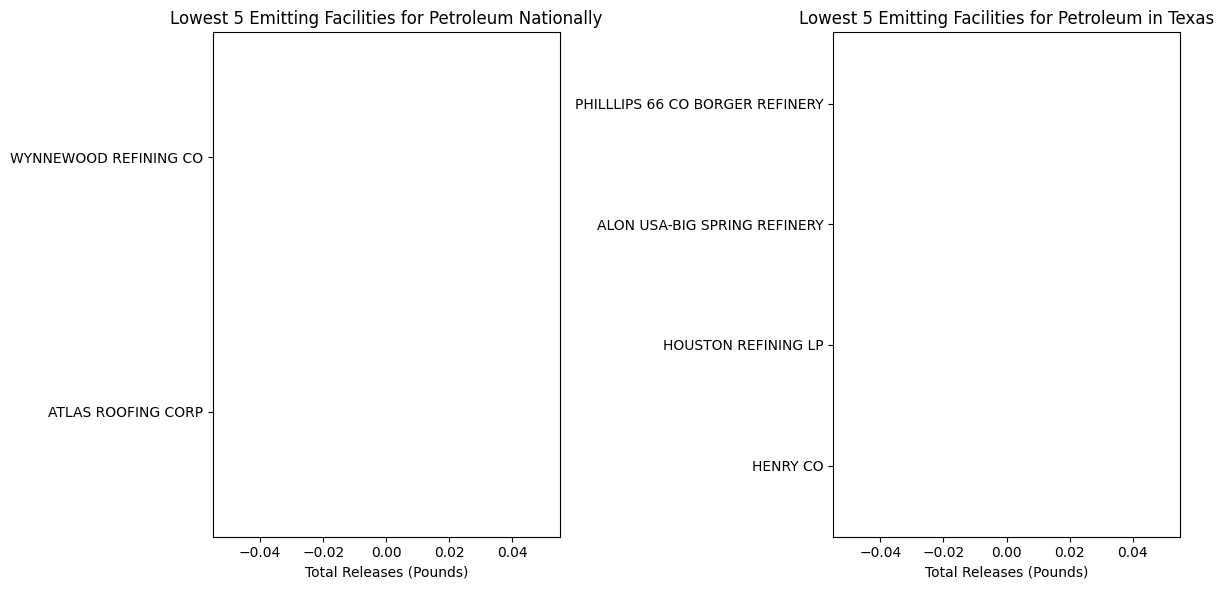

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt

# Find the lowest 5 emitting facilities for petroleum nationally
lowest_5_nationally = petroleum_select_col.nsmallest(5, 'Total Releases')

# Find the lowest 5 emitting facilities for petroleum in Texas
lowest_5_in_tx = tx_facilities_petroleum.nsmallest(5, 'Total Releases')

# Print the lowest 5 nationally
print("Lowest 5 emitting facilities for petroleum nationally:")
print(lowest_5_nationally[['Facility name', 'Total Releases']])

# Print the lowest 5 in Texas
print("\nLowest 5 emitting facilities for petroleum in Texas:")
print(lowest_5_in_tx[['Facility name', 'Total Releases']])

# Create a bar graph to visualize the lowest 5 emitting facilities nationally
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.barh(lowest_5_nationally['Facility name'], lowest_5_nationally['Total Releases'], color='blue')
plt.title('Lowest 5 Emitting Facilities for Petroleum Nationally')
plt.xlabel('Total Releases (Pounds)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest at the top

# Create a bar graph to visualize the lowest 5 emitting facilities in Texas
plt.subplot(122)
plt.barh(lowest_5_in_tx['Facility name'], lowest_5_in_tx['Total Releases'], color='green')
plt.title('Lowest 5 Emitting Facilities for Petroleum in Texas')
plt.xlabel('Total Releases (Pounds)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest at the top

plt.tight_layout()
plt.show()
plt.savefig("png_output/Fig10.png")


Bottom 10 of the top 100 emitting facilities for petroleum in Texas:
                                           Facility name  Total Releases
7564                     DIAMOND SHAMROCK REFINING CO LP        31021.10
25118            EXXONMOBIL OIL BEAUMONT REFINERY (PART)        31640.00
67779                    DIAMOND SHAMROCK REFINING CO LP        31790.00
74559                    PHILLLIPS 66 CO BORGER REFINERY        32798.37
30002                        MOTIVA-PORT ARTHUR REFINERY        32859.00
63972  EXXONMOBIL REFINING & SUPPLY BAYTOWN REFINERY ...        33363.01
54234  VALERO REFINING TEXAS LP CORPUS CHRISTI EAST P...        33838.65
71290                    DIAMOND SHAMROCK REFINING CO LP        34505.10
59379  TOTALENERGIES PETROCHEMICALS & REFINING USA IN...        35000.00
73347            EXXONMOBIL OIL BEAUMONT REFINERY (PART)        35303.80


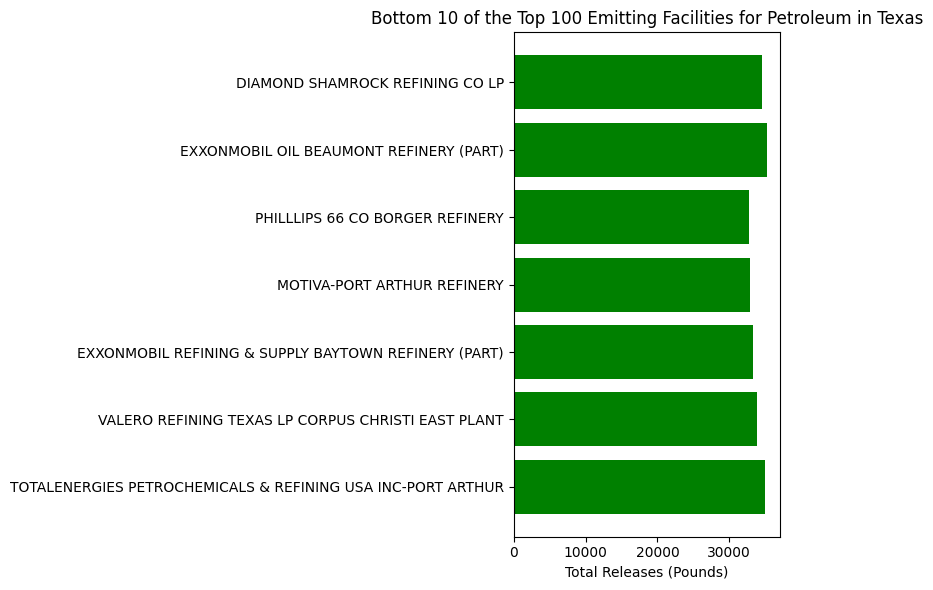

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt

# Find the top 100 emitting facilities for petroleum in Texas
top_100_in_tx = tx_facilities_petroleum.nlargest(100, 'Total Releases')

# Find the bottom 10 among the top 100 in Texas
bottom_10_in_tx = top_100_in_tx.nsmallest(10, 'Total Releases')

# Print the bottom 10 of the top 100 in Texas
print("Bottom 10 of the top 100 emitting facilities for petroleum in Texas:")
print(bottom_10_in_tx[['Facility name', 'Total Releases']])

# Create a bar graph to visualize the bottom 10 of the top 100 emitting facilities in Texas
plt.figure(figsize=(8, 6))
plt.barh(bottom_10_in_tx['Facility name'], bottom_10_in_tx['Total Releases'], color='green')
plt.title('Bottom 10 of the Top 100 Emitting Facilities for Petroleum in Texas')
plt.xlabel('Total Releases (Pounds)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest at the top

plt.tight_layout()
plt.show()
plt.savefig("png_output/Fig11.png")


In [34]:


# Filter the DataFrame for facilities in Texas and in the "Petroleum" category
tx_petroleum_facilities = petroleum_select_col[(petroleum_select_col['State'] == 'TX')]

# Calculate the mean, median, and mode total releases for petroleum facilities in Texas
mean_total_releases_tx = tx_petroleum_facilities['Total Releases'].mean()
median_total_releases_tx = tx_petroleum_facilities['Total Releases'].median()

# Calculate the mode total releases if it exists for Texas
try:
    mode_result = stats.mode(tx_petroleum_facilities['Total Releases'])
    mode_total_releases_tx = mode_result.mode[0]
except IndexError:
    mode_total_releases_tx = None

# Filter the DataFrame for facilities in the "Petroleum" category nationally
national_petroleum_facilities = petroleum_select_col

# Calculate the mean, median, and mode total releases for petroleum facilities nationally
mean_total_releases_national = national_petroleum_facilities['Total Releases'].mean()
median_total_releases_national = national_petroleum_facilities['Total Releases'].median()

# Calculate the mode total releases if it exists for the national data
try:
    mode_result = stats.mode(national_petroleum_facilities['Total Releases'])
    mode_total_releases_national = mode_result.mode[0]
except IndexError:
    mode_total_releases_national = None

# Print the mean, median, and mode total releases for Texas
print("Statistics for Total Releases in Texas (Petroleum facilities):")
print(f"Mean: {mean_total_releases_tx:.2f} pounds")
print(f"Median: {median_total_releases_tx:.2f} pounds")

if mode_total_releases_tx is not None:
    print(f"Mode: {mode_total_releases_tx:.2f} pounds")
else:
    print("There is no unique mode for total releases in Texas.")

# Print the mean, median, and mode total releases for the national data
print("\nStatistics for Total Releases Nationally (Petroleum facilities):")
print(f"Mean: {mean_total_releases_national:.2f} pounds")
print(f"Median: {median_total_releases_national:.2f} pounds")

if mode_total_releases_national is not None:
    print(f"Mode: {mode_total_releases_national:.2f} pounds")
else:
    print("There is no unique mode for total releases nationally.")

# Calculate and print the difference and percent difference between Texas and national statistics
difference = mean_total_releases_tx - mean_total_releases_national
percent_difference = (difference / mean_total_releases_national) * 100

print("\nDifference in Mean Total Releases (Texas - National): {:.2f} pounds".format(difference))
print("Percent Difference in Mean Total Releases (Texas - National): {:.2f}%".format(percent_difference))


Statistics for Total Releases in Texas (Petroleum facilities):
Mean: 21047.30 pounds
Median: 630.64 pounds
There is no unique mode for total releases in Texas.

Statistics for Total Releases Nationally (Petroleum facilities):
Mean: 15156.88 pounds
Median: 203.38 pounds
There is no unique mode for total releases nationally.

Difference in Mean Total Releases (Texas - National): 5890.42 pounds
Percent Difference in Mean Total Releases (Texas - National): 38.86%


In [35]:
# Filter the DataFrame for facilities in Texas and in the "Petroleum" category
tx_petroleum_facilities = petroleum_select_col[(petroleum_select_col['State'] == 'TX')]

# Calculate the quartiles and IQR for total releases in Texas
q1 = tx_petroleum_facilities['Total Releases'].quantile(0.25)
q3 = tx_petroleum_facilities['Total Releases'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = tx_petroleum_facilities[
    (tx_petroleum_facilities['Total Releases'] < lower_bound) |
    (tx_petroleum_facilities['Total Releases'] > upper_bound)
]

# Print the lower and upper bounds
print(f"Lower Bound: {lower_bound:.2f} pounds")
print(f"Upper Bound: {upper_bound:.2f} pounds")

# Print the outliers, if any
if not outliers.empty:
    print("\nOutliers in Total Releases in Texas (Petroleum facilities):")
    print(outliers[['Facility name', 'Total Releases']])
else:
    print("\nNo outliers found in Total Releases in Texas (Petroleum facilities).")


Lower Bound: -9484.73 pounds
Upper Bound: 15881.24 pounds

Outliers in Total Releases in Texas (Petroleum facilities):
                                           Facility name  Total Releases
851    FLINT HILLS RESOURCES CORPUS CHRISTI LLC - WES...        19840.00
910                         ALON USA-BIG SPRING REFINERY        25284.90
1481             EXXONMOBIL OIL BEAUMONT REFINERY (PART)        25035.00
1502                                 HOUSTON REFINING LP        75436.00
1692   EXXONMOBIL REFINING & SUPPLY BAYTOWN REFINERY ...        47000.00
1832                                 HOUSTON REFINING LP        16716.00
1891         CITGO REFINING & CHEMICALS CO LP-WEST PLANT        69401.35
3445                                 HOUSTON REFINING LP       115374.96
4386   FLINT HILLS RESOURCES CORPUS CHRISTI LLC - WES...        17003.23
4697   VALERO REFINING-TEXAS LP CORPUS CHRISTI WEST P...       183760.54
4800   EXXONMOBIL REFINING & SUPPLY BAYTOWN REFINERY ...        67000.00
5319 

Top 10 Outliers in Total Releases in Texas (Petroleum facilities):
                                           Facility name  Total Releases
48565      VALERO REFINING - TEXAS L.P. HOUSTON REFINERY      2057066.00
65997                          BLANCHARD REFINING CO LLC      1757100.00
53394                          BLANCHARD REFINING CO LLC      1526700.00
38170             PHILLIPS 66 CO SWEENY REFINERY COMPLEX      1387540.00
23596                           VALERO REFINING-TEXAS LP      1100000.00
43022  EXXONMOBIL REFINING & SUPPLY BAYTOWN REFINERY ...       560000.00
20337  FLINT HILLS RESOURCES CORPUS CHRISTI LLC - WES...       542953.00
66952                              DEER PARK REFINING LP       490000.00
65865  VALERO REFINING-TEXAS LP CORPUS CHRISTI WEST P...       470642.91
10124        CITGO REFINING & CHEMICALS CO LP EAST PLANT       394231.49


C:\Users\langl\AppData\Local\Temp\ipykernel_21088\2389906876.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Absolute Difference'] = abs(outliers['Total Releases'] - lower_bound)


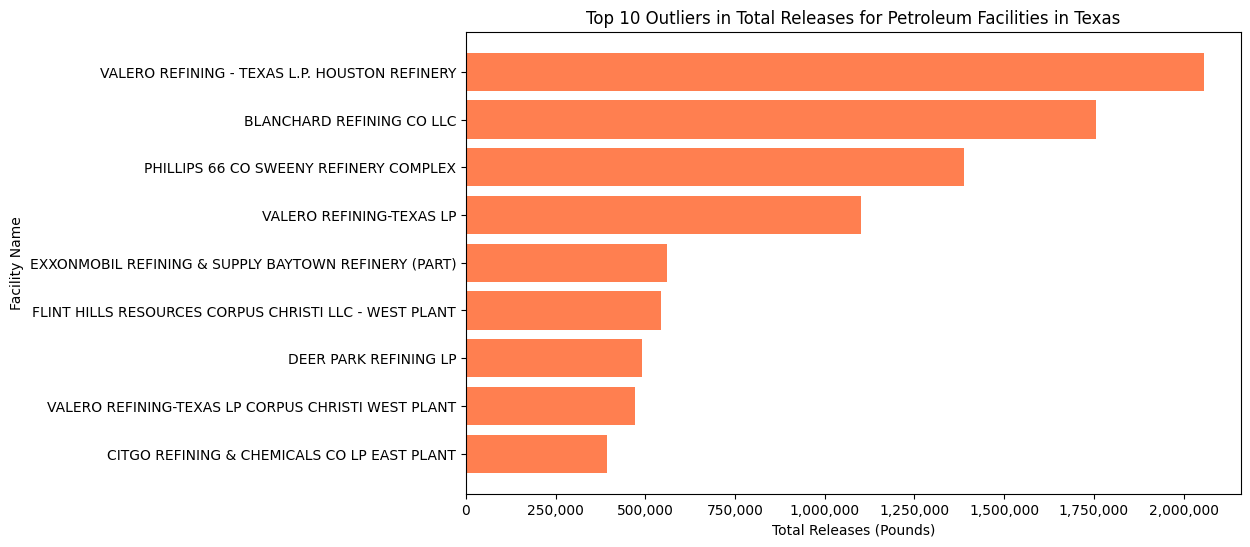

<Figure size 640x480 with 0 Axes>

In [41]:
# Identify outliers
outliers = tx_petroleum_facilities[
    (tx_petroleum_facilities['Total Releases'] < lower_bound) |
    (tx_petroleum_facilities['Total Releases'] > upper_bound)
]

# Find the top 10 outliers by sorting them based on the absolute difference from the bounds
outliers['Absolute Difference'] = abs(outliers['Total Releases'] - lower_bound)
top_10_outliers = outliers.nlargest(10, 'Absolute Difference')

# Print the top 10 outliers
print("Top 10 Outliers in Total Releases in Texas (Petroleum facilities):")
print(top_10_outliers[['Facility name', 'Total Releases']])

import matplotlib.pyplot as plt

# Create a bar chart to visualize the top 10 outliers
plt.figure(figsize=(10, 6))
plt.barh(top_10_outliers['Facility name'], top_10_outliers['Total Releases'], color='coral')
plt.xlabel('Total Releases (Pounds)')
plt.ylabel('Facility Name')
plt.title('Top 10 Outliers in Total Releases for Petroleum Facilities in Texas')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest outlier at the top

# Customize the y-axis tick formatting to display numbers in regular format
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Show the plot
plt.show()
plt.savefig("png_output/Fig12.png")